# What are the most demanded skills for the top 3 most popular data roles?

### Methodology

1. Clean-up skill column
2. Calculate skill count based job title
3. Calculate skill percentage
4. Plot final findings

In [15]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_PL = df[df['job_country'] == 'Poland']
df_skills = df_PL.explode('job_skills')

In [17]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
912,python,Data Engineer,2240
1160,sql,Data Engineer,2231
1159,sql,Data Analyst,1572
93,azure,Data Engineer,1453
83,aws,Data Engineer,1251
...,...,...,...
226,css,Senior Data Scientist,1
228,dart,Data Scientist,1
239,datarobot,Data Engineer,1
255,db2,Machine Learning Engineer,1


In [18]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

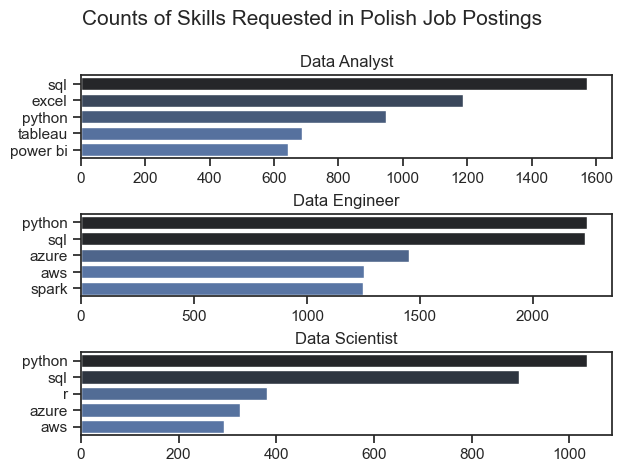

In [22]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()

fig.suptitle('Counts of Skills Requested in Polish Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [23]:
# Use original df to get the count of job titles
df_job_title_count = df_PL['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,3540
1,Data Analyst,3172
2,Software Engineer,1888
3,Data Scientist,1713
4,Senior Data Engineer,1275
5,Business Analyst,1204
6,Senior Data Analyst,609
7,Senior Data Scientist,531
8,Machine Learning Engineer,468
9,Cloud Engineer,393


In [24]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,2240,3540,63.276836
1,sql,Data Engineer,2231,3540,63.022599
2,sql,Data Analyst,1572,3172,49.558638
3,azure,Data Engineer,1453,3540,41.045198
4,aws,Data Engineer,1251,3540,35.338983
...,...,...,...,...,...
1399,css,Senior Data Scientist,1,531,0.188324
1400,dart,Data Scientist,1,1713,0.058377
1401,datarobot,Data Engineer,1,3540,0.028249
1402,db2,Machine Learning Engineer,1,468,0.213675


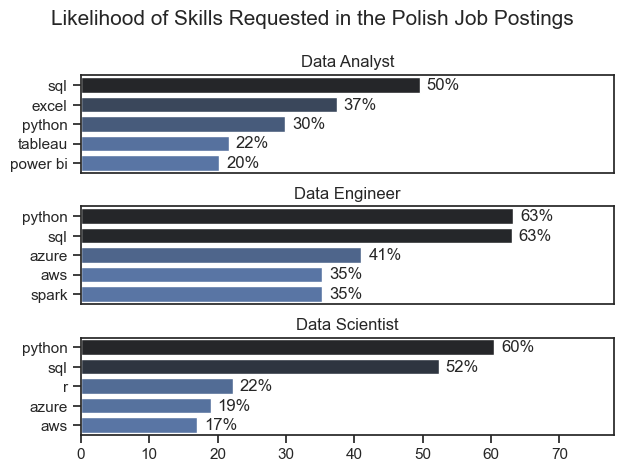

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in the Polish Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

In [32]:
df_skills_perc[df_skills_perc['job_title_short'] == 'Data Analyst'].head(5)

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
2,sql,Data Analyst,1572,3172,49.558638
6,excel,Data Analyst,1188,3172,37.452711
8,python,Data Analyst,948,3172,29.886507
18,tableau,Data Analyst,687,3172,21.658260
20,power bi,Data Analyst,642,3172,20.239596


In [33]:
df_skills_perc[df_skills_perc['job_title_short'] == 'Data Engineer'].head(5)

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,2240,3540,63.276836
1,sql,Data Engineer,2231,3540,63.022599
3,azure,Data Engineer,1453,3540,41.045198
4,aws,Data Engineer,1251,3540,35.338983
5,spark,Data Engineer,1250,3540,35.310734


In [35]:
df_skills_perc[df_skills_perc['job_title_short'] == 'Data Scientist'].head(5)

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
7,python,Data Scientist,1036,1713,60.478692
10,sql,Data Scientist,897,1713,52.364273
40,r,Data Scientist,381,1713,22.241681
48,azure,Data Scientist,325,1713,18.972563
55,aws,Data Scientist,292,1713,17.046118
